In [1]:
# 상권 분석
# https://www.data.go.kr/data/15083033/fileData.do

In [2]:
!unzip '/content/drive/MyDrive/Colab Notebooks/소상공인시장진흥공단_상가(상권)정보_20221231.zip' -d '/content/drive/MyDrive/Colab Notebooks/data/상권분석'

Archive:  /content/drive/MyDrive/Colab Notebooks/소상공인시장진흥공단_상가(상권)정보_20221231.zip
replace /content/drive/MyDrive/Colab Notebooks/data/상권분석/[필독]파일열람방법.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import glob
import pandas as pd
file_lists = glob.glob('/content/drive/MyDrive/Colab Notebooks/data/상권분석/*.csv')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium

In [5]:
df_202212_세종 = pd.read_csv(file_lists[0])
df_202212_세종.shape

(111023, 39)

In [6]:
df_202212_세종.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
# 상권중에 커피가 들어간 업종의 갯수
df_coffee =  df_202212_세종[df_202212_세종['상권업종소분류명'].str.contains('커피')]
df_coffee.shape

(4610, 39)

In [8]:
# 서울의 커피전문점의 개수  
df_seoul = pd.read_csv( file_lists[-2])
df_seoul[df_seoul['상권업종소분류명'].str.contains('커피')]
df_seoul.shape

<ipython-input-8-659386a39948>:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_seoul = pd.read_csv( file_lists[-2])


(116391, 39)

In [9]:
df_seoul2 =  df_seoul[df_seoul['상권업종소분류명'].str.contains('커피')]

In [10]:
# 커피전문점의 이름들...
# 상호명중에 가장 많은 이름의 상호를 찾아보자
df_seoul2['상호명'].value_counts()[:10]

카페         212
이디야커피       63
더리터         62
더벤티         44
빽다방         43
투썸플레이스      30
스타벅스        25
할리스커피       24
공차          23
메가엠지씨커피     20
Name: 상호명, dtype: int64

In [11]:
df_coffee_id =  df_seoul2[df_seoul2['상호명'] == '이디야커피']
df_coffee_id.reset_index(drop=True,inplace=True)

In [12]:
# 중복없이 지점만 출력
df_coffee_id['지점명'].unique()

array([nan, '서곡지구점', '정읍중앙점', '이마트군산점', '군산시민문화회관점', '군산조촌점', '전주효천우미린점',
       '진북점', '송천점', '전주중산점', '아중점', '완주제일점', '서신점', '익산시청점', '전북진안점',
       '근대역사점', '장수점', '본병원점', '군산나운점', '우아한시티점', '전주평화사거리점', '남원중앙점',
       '송학점', '전주대점', '무주점', '전주송천용소점', '임실점', '전주고사점', '순창점', '군산미장점',
       '서부시장점', '전주호반5차점', '전주효자점', '격포점', '어양동점', '전동점', '전주사대부고점',
       '전주에코세병호점', '군산산북동점', '교대점', '전북모악점', '부안내소사점', '정읍상동점', '전주KBS점',
       '시외버스터미널점', '전주평화점', '익산제일점', '에코점', '전주하가지구점', '익산영등동점', '만성골드점',
       '전주기지제호수점', '전주휴먼시아점', '전주북일점', '숍서신바구멀점', '전주효자우전점', '진안마이산점'],
      dtype=object)

In [13]:
# 전처리... (커피전문점에 대해.... 이디야커피)
# 지점명이 na이면 해당 na의 상호명으로 대체
df_coffee_id[df_coffee_id['지점명'].isna()]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23423571,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,4511114600107790002000001,NaN,전라북도 전주시 덕진구 오정1길 4,560500,54872.0,NaN,NaN,NaN,127.060137,35.835669
4,25385639,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,4511310700104700003005443,NaN,전라북도 전주시 덕진구 기린대로 398,561180,54931.0,NaN,1.0,NaN,127.132504,35.837674
21,16742442,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,4511113800107590001000001,NaN,전라북도 전주시 완산구 홍산로 14,560292,55079.0,NaN,1.0,NaN,127.105964,35.795893
32,26364926,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,4580025024107640002023866,NaN,전라북도 부안군 부안읍 오정2길 38,579805,56313.0,NaN,NaN,NaN,126.736079,35.725121
40,8616677,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,4571033024106610001000001,NaN,전라북도 완주군 이서면 출판로 26-3,565851,55365.0,NaN,1.0,NaN,127.055931,35.839368


In [14]:
temp = df_coffee_id.loc[:,['상호명','지점명']].ffill(axis=1)
df_coffee_id.loc[:,'지점명']  = temp['지점명']

<ipython-input-14-f39628850e5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_id.loc[:,'지점명']  = temp['지점명']


In [15]:
pd.options.display.max_columns = None

In [16]:
df_coffee_id.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23423571,이디야커피,이디야커피,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,45,전라북도,45113,전주시 덕진구,4511367000,혁신동,4511313800,중동,4511313800107790002,1,대지,779,2.0,전라북도 전주시 덕진구 중동 779-2,451134640745,전라북도 전주시 덕진구 오정1길,4,NaN,4511114600107790002000001,NaN,전라북도 전주시 덕진구 오정1길 4,560500,54872.0,NaN,NaN,NaN,127.060137,35.835669


In [17]:
# 전국데이터에 대해서
# 1. 상권업종소분류명 에 커피가 포함되어  있는 데이터를 찾아서
# 2. 상호명의 수를 count하고
# 3. 가장많이 나온 프랜차이즈 상호에대해서 데이터를 정리..

In [18]:
df_lists = [pd.read_csv(file,low_memory=False) for file in file_lists]

In [19]:
df = pd.concat(df_lists)
df.shape

(2532877, 39)

In [36]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/소상공인.csv',encoding='utf-8')

In [20]:
df_coffee =  df[df['상권업종소분류명'].str.contains('커피')]
df_coffee.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
13,20778927,키즈까페아이사랑,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,42,강원도,42150,강릉시,4215064500,성덕동,4215012500,입암동,4215012500107080003,1,대지,708,3.0,강원도 강릉시 입암동 708-3,421503220017,강원도 강릉시 성덕포남로,45,8.0,4215012500107080003000001,NaN,강원도 강릉시 성덕포남로 45-8,210938.0,25615.0,NaN,2,NaN,128.919456,37.759315
39,20658047,힐링,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,42,강원도,42130,원주시,4213055000,단구동,4213010700,단구동,4213010700116690010,1,대지,1669,10.0,강원도 원주시 단구동 1669-10,421304457132,강원도 원주시 단관길,114,6.0,4213010700116690010000001,NaN,강원도 원주시 단관길 114-6,220965.0,26490.0,NaN,NaN,NaN,127.958442,37.319958
56,15589162,드롭탑,속초엑스포점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,42,강원도,42210,속초시,4221058000,조양동,4221010800,조양동,4221010800115470008,1,대지,1547,8.0,강원도 속초시 조양동 1547-8,422103223008,강원도 속초시 엑스포로,45,NaN,4221010800115470008000001,NaN,강원도 속초시 엑스포로 45,217813.0,24872.0,NaN,NaN,NaN,128.586322,38.191024
83,20762517,상유재카페,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,42,강원도,42770,정선군,4277025000,정선읍,4277025021,정선읍,4277025021102170010,1,대지,217,10.0,강원도 정선군 정선읍 봉양리 217-10,427703229023,강원도 정선군 정선읍 정선로,1323,NaN,4277025021102170001011447,NaN,강원도 정선군 정선읍 정선로 1323,233804.0,26131.0,NaN,1,NaN,128.660805,37.379458
269,20527333,수정다방,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,42,강원도,42820,고성군,4282025300,거진읍,4282025321,거진읍,4282025321101580104,1,대지,158,104.0,강원도 고성군 거진읍 거진리 158-104,428204502348,강원도 고성군 거진읍 행랑골길,6,NaN,4282025321101580104018419,수정다방,강원도 고성군 거진읍 행랑골길 6,219901.0,24714.0,NaN,NaN,NaN,128.456166,38.447977


In [21]:
df_coffee['상호명'].value_counts()

카페           5218
이디야커피        2075
컴포즈커피        1376
스타벅스         1208
투썸플레이스        926
             ... 
1993            1
메가MGG커피         1
서동카페            1
록수다방            1
메이크프로덕션지점       1
Name: 상호명, Length: 65770, dtype: int64

In [22]:
df_coffee.loc[df_coffee['상호명'].str.contains('이디야'),'상호명'].unique()

array(['이디야커피', '이디야에스프레소', '이디야커피강릉올림픽선수촌점', '이디야커피인제점인제점', '양양이디야',
       '이디야커피낙원점', '이디야커피홍천제일점', '이디야커피장학점', '이디야커피전문점', '이디야커피수원영통디지털점',
       '이디야커피숍', '이디야커피전문일산시장점', '이디야', '이디야커피남양주가운점', '이디야커피송탄점',
       '이디야광명휴먼시아', '거산파트너스구래아크라시티이디야점', '이디야커피일산미래로타운점', '이디야커피동서울대점',
       '이디야커피안산반월공단점', '이디야커피안산사동점', '이디야커피가현초교점', '이디야죽전벽산',
       '이디야커피양주광적점', '시흥이디야', '이디야커피수지동천중앙점', '이디야-고잔이마트', '이디야커피미사망월점',
       '이디야수원디지털엠파이어2', '이디야커피양주삼숭점', '이디야커피향남롯데시네마점',
       '이디야판교중앙점EDIYACOFFEE', '이디야커피김포나비초교점', '이디야한양대애리카캠퍼스',
       '이디야커피호매실중앙점', '코레일유통이디야커피', '이디야커피파주운정이마트점', '이디야파주동패',
       '52아레테이디야미사센텀비즈점', '이디야점', '화서복지장학회이디야커피', '이디야커피창녕점',
       '이디야커피김해부원동점', '이디야커피창원시민체육관점', '이디야창원이마트', '이티엔커머스이디야',
       '이디야커피개양오거리점', '케이디야스텍', '이디야커피덕곡점덕곡점', '이디야커피경주황성유림점',
       '이디야커피경북성주점', '이디야커피경주안강점', '이디야커피대구송현점', '이디야커피대명동점',
       '이디야커피대구봉덕점', '이디야커피수영현대점', '이디야커피보수점', '이디야커피부산괴정대로점',
       '이디야커피경마공원점', '이디야커피부산금강로점', '이디야커피서부산유통지구점', '이디야커피국제물류점',
       '이디야커피유엔공원점',

In [23]:
# 컬럼에서 '코드'가 들어 있는 컬럼을 제외한다.

In [24]:
df_coffee.columns[df_coffee.columns.str.contains('코드')] + ['건물관리번호']
df_coffee_drop = df_coffee.drop(columns = df_coffee.columns[df_coffee.columns.str.contains('코드')])

In [25]:
df_coffee_drop['상호명'].value_counts()[1:5]

이디야커피     2075
컴포즈커피     1376
스타벅스      1208
투썸플레이스     926
Name: 상호명, dtype: int64

In [26]:
df_coffee_drop['상호명'].value_counts()[1:5].index

Index(['이디야커피', '컴포즈커피', '스타벅스', '투썸플레이스'], dtype='object')

In [27]:
store_count = []
for store in ['이디야', '컴포즈', '스타벅스', '투썸플레이스']:
  count_ = len(df_coffee_drop.loc[df_coffee_drop['상호명'].str.contains(store), '상호명'])
  store_count.append(count_)

dict(zip(df_coffee_drop['상호명'].value_counts()[1:5].index,store_count))


{'이디야커피': 2224, '컴포즈커피': 1437, '스타벅스': 1506, '투썸플레이스': 1119}

In [28]:
 # 4개 지점의 데이터만 추출 
 major_store_4 = ['이디야', '컴포즈', '스타벅스', '투썸플레이스'] 

In [29]:
temp = [df_coffee_drop['상호명'].str.contains(i)  for i in major_store_4]

In [30]:
from functools import reduce
temp = reduce(lambda x,y: x+y, temp )

In [31]:
df_coffee_top4 = df_coffee_drop.loc[temp]

temp = np.where(df_coffee_top4['상호명'].str.contains('이디야'),'이디야',np.nan)
temp = np.where(df_coffee_top4['상호명'].str.contains('컴포즈'),'컴포즈',temp)
temp = np.where(df_coffee_top4['상호명'].str.contains('스타벅스'),'스타벅스',temp)
temp = np.where(df_coffee_top4['상호명'].str.contains('투썸플레이스'),'투썸플레이스',temp)
df_coffee_top4['프렌차이즈명'] =temp

<ipython-input-31-7b3983b8a7ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_top4['프렌차이즈명'] =temp


In [ ]:
# 한글처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 런타임 재시작 이후
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [1]:
import seaborn as sns
plt.figure(figsize=(13,13))
sns.scatterplot(data = df_coffee_top4,x = '경도', y='위도', hue='프렌차이즈명',alpha = 0.5)
# df_coffee_top4.plot(kind = 'scatter', x = '경도', y='위도', grid=True)
plt.show()

NameError: ignored

<Figure size 1300x1300 with 0 Axes>

In [3]:
import pandas as pd
df_seoul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/상권분석/소상공인시장진흥공단_상가(상권)정보_서울_202212.csv')

In [41]:
df_seoul['상권업종대분류명'].unique()

array(['생활서비스', '소매', '숙박', '음식', '학문/교육', '관광/여가/오락', '부동산', '스포츠'],
      dtype=object)

In [4]:
df_seoul['상권업종대분류명'].value_counts()

음식          125771
소매          107460
생활서비스        79679
학문/교육        27288
부동산          19784
관광/여가/오락      9820
스포츠           5420
숙박            2502
Name: 상권업종대분류명, dtype: int64

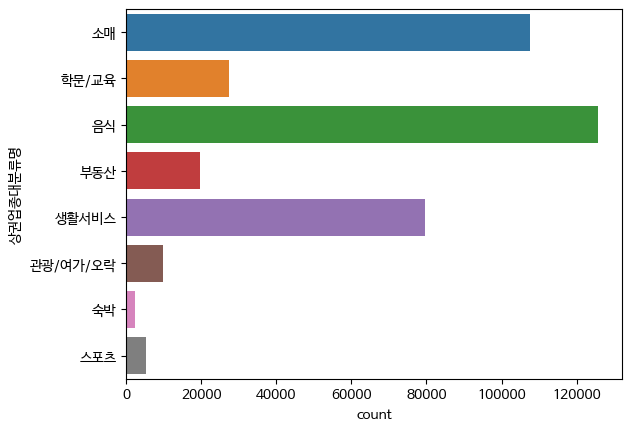

In [6]:
sns.countplot(data=df_seoul, y='상권업종대분류명')
plt.show()

In [7]:
df_seoul.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

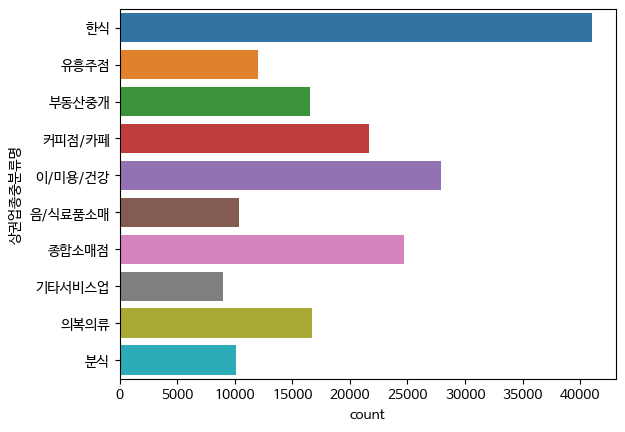

In [43]:
# 상위 10개만 
temp = df_seoul['상권업종중분류명'].value_counts()
temp = df_seoul[df_seoul['상권업종중분류명'].isin(temp[:10].index)]['상권업종중분류명']
temp = pd.DataFrame(temp)
sns.countplot(temp, y = '상권업종중분류명')
plt.show()

In [45]:
pd.options.display.max_columns = None

In [64]:
# df_seoul[df_seoul['상호명'].str.contains('김밥','햄버거')]['상권업종중분류명'].unique()
# df_seoul[df_seoul['상호명'].str.contains('김밥|햄버거')]['상권업종중분류명'].unique()
df_seoul[df_seoul['상호명'].str.contains('햄버거')]['상권업종중분류명'].unique()

array(['패스트푸드', '한식', '양식'], dtype=object)

In [57]:
df_seoul_fastfood = df_seoul[df_seoul['상권업종중분류명'] == '패스트푸드']
df_seoul_fastfood.shape

(6057, 39)

In [73]:
pd.options.display.max_rows = None
fastFood_cnt = [
len(df_seoul_fastfood[df_seoul_fastfood['상호명'].str.contains('롯데|롯대')]),
len(df_seoul_fastfood[df_seoul_fastfood['상호명'].str.contains('맥도|멕도')]),
len(df_seoul_fastfood[df_seoul_fastfood['상호명'].str.contains('버거킹')])
]

In [ ]:
# 패스트푸드점 입지분석
# 서울에 3개 버거패스트푸드점의 갯수와 비율
# 지도에 표시 - x:경도 y:위도 seaborn
# folium을 이용해서 표시

<Axes: >

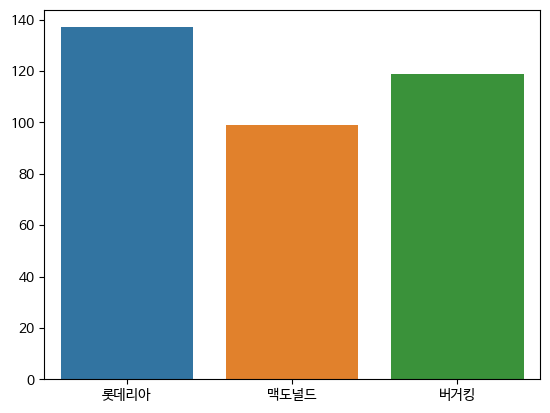

In [75]:

sns.barplot(x = ['롯데리아','맥도널드','버거킹'], y = fastFood_cnt)

In [91]:
import numpy as np
np.array(fastFood_cnt).sum()
list(map(lambda x : round( x / np.array(fastFood_cnt).sum(),4), fastFood_cnt))



[0.3859, 0.2789, 0.3352]

In [98]:
# 지도 seaborn
df_seoul['경도'].head()
df_seoul['위도'].head()
df_seoul['도로명주소'].head()
df_seoul['상호명'].head()

0         제중건강원
1         민속악기사
2         태평양진주
3    김선희꼼꼼국어교습소
4           비지트
Name: 상호명, dtype: object

In [105]:
temp1 = df_seoul_fastfood[df_seoul_fastfood['상호명'].str.contains('롯데|롯대')][['경도','위도','도로명주소']]
temp2 = df_seoul_fastfood[df_seoul_fastfood['상호명'].str.contains('맥도|멕도')][['경도','위도','도로명주소']]
temp3 = df_seoul_fastfood[df_seoul_fastfood['상호명'].str.contains('버거킹')][['경도','위도','도로명주소']]

In [106]:
temp1['브랜드명'] = '롯데리아'
temp2['브랜드명'] = '맥도널드'
temp3['브랜드명'] = '버거킹'

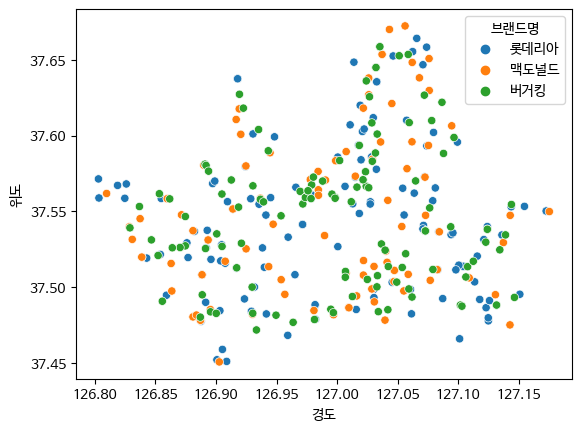

In [107]:
fastfood3_df =  pd.concat([temp1,temp2,temp3])
fastfood3_df = fastfood3_df.reset_index(drop=True)
sns.scatterplot(data = fastfood3_df, x='경도',y='위도', hue='브랜드명')
plt.show()

In [128]:
import folium
from folium.plugins import MarkerCluster

In [139]:
map = folium.Map(location= [ fastfood3_df['위도'].mean() , fastfood3_df['경도'].mean()  ],zoom_start=12  )

In [140]:
marker_cluser =  MarkerCluster().add_to(map)

In [148]:
fastfood3_df = fastfood3_df.reset_index(drop=True)
for i in range(len(fastfood3_df)):
  if fastfood3_df.loc[i,'브랜드명'] == '롯데리아':
    icon_color = 'red'
  elif fastfood3_df.loc[i,'브랜드명'] == '맥도널드':
    icon_color = 'green'
  else:
    icon_color = 'blue'

  folium.Marker( (fastfood3_df['위도'][i],fastfood3_df['경도'][i]),
                popup = fastfood3_df['도로명주소'][i],
                icon = folium.Icon(color = icon_color)
                ).add_to(marker_cluser)

In [ ]:
map